# Data Description
* **gender**: Whether the customer is a male or a female
* **SeniorCitizen**: Whether the customer is a senior citizen or not
* **Partner**: Whether the customer has a partner or not
* **Dependents**: Whether the customer has dependents or not
* **tenure**:  Number of months the customer has stayed with the company
* **PhoneService**:  Whether the customer has a phone service or not
* **MultipleLines**:  Whether the customer has multiple lines or not
* **InternetService**:  Customer’s internet service provider
* **OnlineSecurity**:  Whether the customer has online security or not
* **OnlineBackup**:  Whether the customer has online backup or not
* **DeviceProtection**:  Whether the customer has device protection or not
* **TechSupport**:  Whether the customer has tech support or not
* **StreamingTV**: Whether the customer has streaming TV or not
* **StreamingMovies**:  Whether the customer has streaming movies or not
* **Contract**:  The contract term of the customer
* **PaperlessBilling**:  Whether the customer has paperless billing or not
* **PaymentMethod**:  The customer’s payment method
* **MonthlyCharges**:  The amount charged to the customer monthly
* **TotalCharges**:  The total amount charged to the customer
* **Churn**:  Whether the customer churned or not

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,OrdinalEncoder

In [6]:
pd.set_option("display.max_columns",None)

In [7]:
dataset = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [8]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
dataset[dataset.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [15]:
data = dataset.copy()

In [20]:
data.drop("customerID",axis=1,inplace=True)

In [21]:
for f in data.columns:
    print(f"{f}: {data[f].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [25]:
data["TotalCharges"] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [27]:
data[data["TotalCharges"] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [32]:
data = data[~(data["TotalCharges"].isnull())]

In [33]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [35]:
data.replace(['No phone service' ,'No internet service'],"No",inplace=True)

In [36]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [45]:
from warnings import filterwarnings
filterwarnings("ignore")

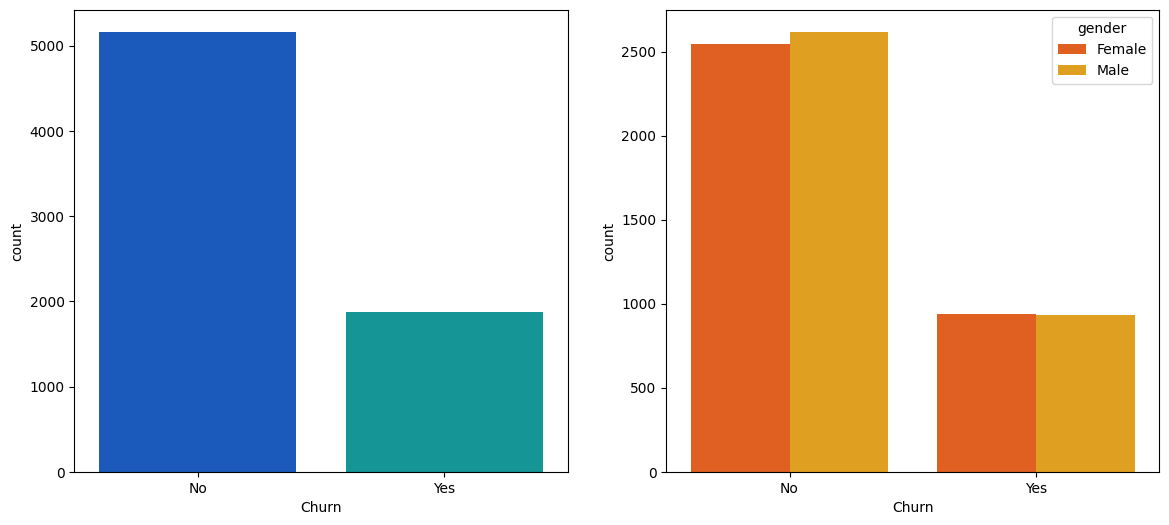

In [47]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,2)
sns.countplot(data=data,x='Churn',hue='gender',palette='autumn')
plt.subplot(1,2,1)
sns.countplot(data=data,x='Churn',palette='winter')
plt.show()

In [49]:
cat = data.select_dtypes('object').columns

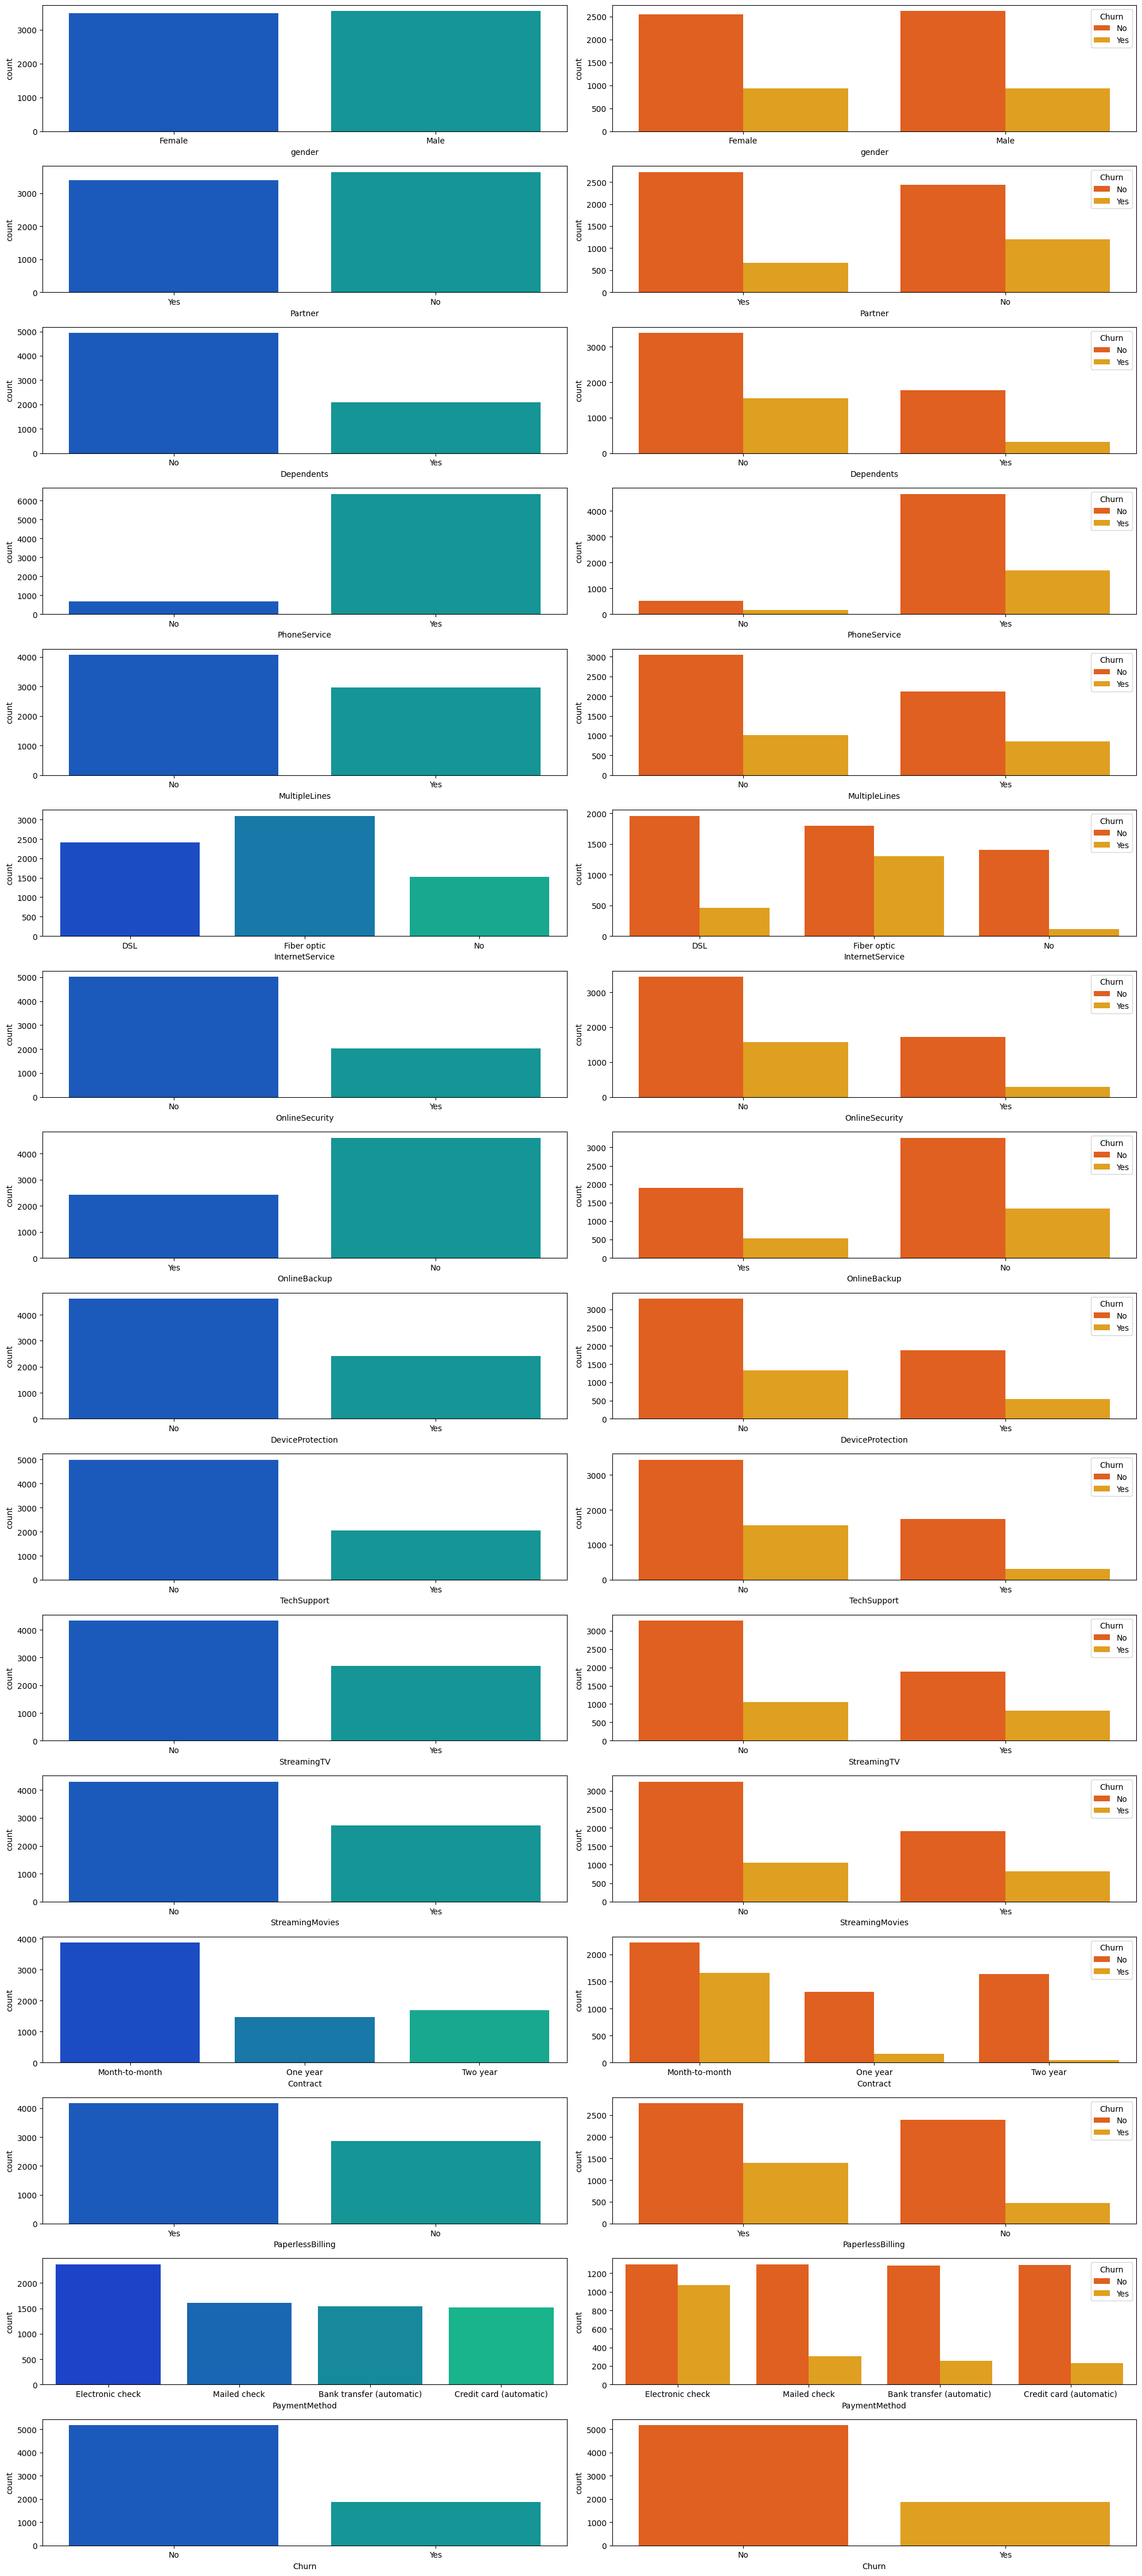

In [56]:
f,ax = plt.subplots(len(cat),2,figsize=(20,45))
i = 0
for f in cat:
    j = 0
    sns.countplot(data=data,x=f,palette='winter',ax=ax[i,j])
    j += 1
    sns.countplot(data=data,x=f,hue='Churn',palette='autumn',ax=ax[i,j])
    i += 1
plt.tight_layout()
plt.show()

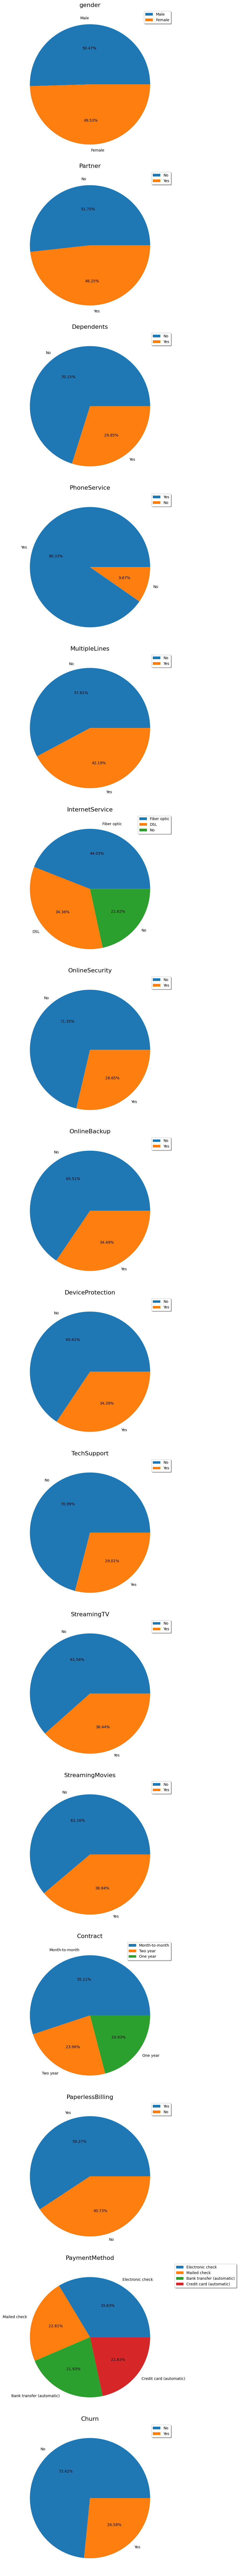

In [82]:
plt.figure(figsize=(10,len(cat)*6))
for i,f in enumerate(cat):
    plt.subplot(len(cat),1,i+1)
    plt.subplots_adjust(hspace=1)
    plt.title(f,fontsize=16)
    plt.pie(data[f].value_counts(),labels=data[f].value_counts().index,autopct='%.2f%%')
    plt.legend(shadow=True,bbox_to_anchor=[1.05,1])
plt.tight_layout()
plt.show()

In [84]:
# the data is imbalanced
data.Churn.value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [85]:
data.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [90]:
oe = OrdinalEncoder()

In [94]:
Ordinal_cat = [x for x in cat if data[x].nunique() == 2]
for x in Ordinal_cat:
    print(x,":",data[x].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
PaperlessBilling : ['Yes' 'No']
Churn : ['No' 'Yes']


In [98]:
data[Ordinal_cat] = oe.fit_transform(data[Ordinal_cat])

In [99]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,0.0,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0.0,Mailed check,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Mailed check,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,0.0,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,70.70,151.65,1.0


In [105]:
data = pd.get_dummies(data).astype(int)

In [106]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29,29,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56,1889,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53,108,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42,1840,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70,151,1,0,1,0,1,0,0,0,0,1,0


In [107]:
no = data[data["Churn"] == 0]

In [108]:
no.shape

(5163, 27)

In [109]:
yes = data[data["Churn"] == 1]
yes.shape

(1869, 27)

In [111]:
no = no.sample(yes.shape[0])

In [112]:
data = pd.concat((no,yes),axis=0)

In [114]:
data.reset_index(drop=True,inplace=True)

In [115]:
from sklearn.model_selection import train_test_split

In [248]:
x_train,x_test,y_train,y_test = train_test_split(data.drop("Churn",axis=1),data["Churn"],test_size=0.2,random_state=42)

In [249]:
sc = StandardScaler()

In [250]:
x_train[["TotalCharges","MonthlyCharges","tenure"]] = sc.fit_transform(x_train[["TotalCharges","MonthlyCharges","tenure"]])

In [251]:
x_test[["TotalCharges","MonthlyCharges","tenure"]] = sc.transform(x_test[["TotalCharges","MonthlyCharges","tenure"]])

In [252]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
485,1,0,0,0,0.004760,1,1,0,1,0,0,1,1,0,1.134019,0.302141,0,1,0,0,1,0,0,0,1,0
2170,1,0,0,1,-1.132263,0,0,0,1,0,0,0,0,1,-1.272254,-0.941745,1,0,0,1,0,0,0,0,0,1
3291,1,0,0,0,-0.626919,1,0,0,0,0,0,0,1,1,0.436549,-0.484358,0,1,0,1,0,0,0,0,1,0
1097,1,0,1,0,1.647127,1,1,0,1,1,0,0,1,1,0.889905,2.024950,0,1,0,0,0,1,0,0,1,0
258,1,0,0,0,-0.163687,1,0,1,0,0,1,0,0,0,-0.470163,-0.325186,1,0,0,1,0,0,0,0,1,0


In [253]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1151,1,0,1,1,1.057560,1,1,1,0,0,1,0,1,0,0.122687,0.835369,1,0,0,1,0,0,0,0,1,0
538,1,0,0,0,-0.079463,0,0,1,1,0,0,0,1,1,-0.818898,-0.415071,1,0,0,1,0,0,1,0,0,0
351,1,0,0,0,1.857687,1,1,1,1,1,1,1,1,0,1.587375,2.865755,0,1,0,0,0,1,1,0,0,0
1108,0,0,0,0,-0.247911,1,1,0,0,0,0,0,0,0,-1.446621,-0.673024,0,0,1,0,0,1,0,0,0,1
1662,0,0,0,0,-1.090151,1,0,0,0,0,0,0,0,1,0.087814,-0.898675,0,1,0,1,0,0,0,0,1,0


In [254]:
import tensorflow as tf

In [255]:
ann = tf.keras.Sequential()

In [256]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [257]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
#ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
#ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [258]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [259]:
ann.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [260]:
ann.fit(x_train,y_train,epochs=120,batch_size=32)

Epoch 1/120
94/94 [==============================] - 1s 2ms/step - loss: 0.6792 - accuracy: 0.5478
Epoch 2/120
94/94 [==============================] - 0s 2ms/step - loss: 0.6123 - accuracy: 0.6863
Epoch 3/120
94/94 [==============================] - 0s 3ms/step - loss: 0.5481 - accuracy: 0.7298
Epoch 4/120
94/94 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.7498
Epoch 5/120
94/94 [==============================] - 0s 3ms/step - loss: 0.5055 - accuracy: 0.7582
Epoch 6/120
94/94 [==============================] - 0s 3ms/step - loss: 0.5010 - accuracy: 0.7599
Epoch 7/120
94/94 [==============================] - 0s 3ms/step - loss: 0.4976 - accuracy: 0.7639
Epoch 8/120
94/94 [==============================] - 0s 2ms/step - loss: 0.4944 - accuracy: 0.7635
Epoch 9/120
94/94 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7639
Epoch 10/120
94/94 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.7649
Epoch 11/

In [261]:
y_pred = ann.predict(x_test)

24/24 [==============================] - 0s 3ms/step


In [262]:
from sklearn.metrics import confusion_matrix

In [263]:
y_pred2 = [0 if x < 0.55 else 1 for x in y_pred]

In [264]:
cm = confusion_matrix(y_test,y_pred2)

<Axes: >

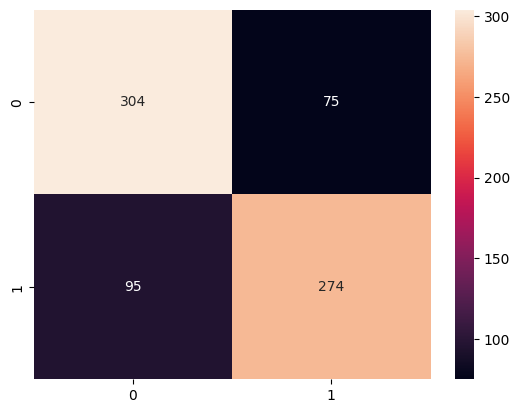

In [265]:
sns.heatmap(cm,annot=True,fmt='.3g')